In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Object Creation

### Series 
One-dimensional ndarray with axis labels <br>
Is used for index <br>
The axis labels are collectively referred to as **Index**

In [3]:
s = pd.Series([0, 1, 5, 2, 1], index=['a', 'b', 'c', 'd', 'e'])
# Is equivalent to
s = {'a':0, 'b':1, 'c':5, 'd':2, 'e':1}
s = pd.Series(s)
s

a    0
b    1
c    5
d    2
e    1
dtype: int64

### DataFrame
Is the main pandas Object <br>
Represents a normal table like in Exel for example

In [4]:
dates = pd.date_range('20180101', periods=6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(data=np.random.randn(6, 3), columns=['A', 'B', 'C'], index=dates)
df

,A,B,C
2018-01-01,-0.529390,-0.471139,-0.063948
2018-01-02,-0.402408,-0.722933,-0.696705
2018-01-03,0.533315,1.770016,0.736847
2018-01-04,1.486864,-1.897323,0.434942
2018-01-05,1.085583,-1.148215,-0.126872
2018-01-06,-0.944765,0.308872,0.271907


# Viewing Data

In [6]:
# Top of table, default=5
df.head(2)

,A,B,C
2018-01-01,-0.529390,-0.471139,-0.063948
2018-01-02,-0.402408,-0.722933,-0.696705


In [7]:
# Bottom of table
df.tail(2)

,A,B,C
2018-01-05,1.085583,-1.148215,-0.126872
2018-01-06,-0.944765,0.308872,0.271907


In [8]:
# Table index
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# Table columns
df.columns

Index([u'A', u'B', u'C'], dtype='object')

In [10]:
# Table values
df.values

array([[-0.52939041, -0.47113901, -0.06394772],
       [-0.40240841, -0.72293322, -0.69670487],
       [ 0.53331489,  1.77001568,  0.73684732],
       [ 1.48686399, -1.89732311,  0.43494236],
       [ 1.08558295, -1.14821521, -0.12687171],
       [-0.9447654 ,  0.30887169,  0.27190735]])

In [11]:
# Quick summary of data
df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.204866,-0.360121,0.092695
std,0.975359,1.273819,0.502012
min,-0.944765,-1.897323,-0.696705
25%,-0.497645,-1.041895,-0.111141
50%,0.065453,-0.597036,0.103980
75%,0.947516,0.113869,0.394184
max,1.486864,1.770016,0.736847


### Sorting

In [12]:
# By axis
# Axis 0 = rows
# Axis 1 = columns
df.sort_index(axis=1, ascending=False)

,C,B,A
2018-01-01,-0.063948,-0.471139,-0.529390
2018-01-02,-0.696705,-0.722933,-0.402408
2018-01-03,0.736847,1.770016,0.533315
2018-01-04,0.434942,-1.897323,1.486864
2018-01-05,-0.126872,-1.148215,1.085583
2018-01-06,0.271907,0.308872,-0.944765


In [13]:
# By values
df.sort_values(by='B', ascending=False)

,A,B,C
2018-01-03,0.533315,1.770016,0.736847
2018-01-06,-0.944765,0.308872,0.271907
2018-01-01,-0.529390,-0.471139,-0.063948
2018-01-02,-0.402408,-0.722933,-0.696705
2018-01-05,1.085583,-1.148215,-0.126872
2018-01-04,1.486864,-1.897323,0.434942


# Selection

In [14]:
# Selecting one cloumn
# Creates a Series
t = df['C']

### Selection by label
label is the index

In [15]:
# By index
df.loc['20180105']

A    1.085583
B   -1.148215
C   -0.126872
Name: 2018-01-05 00:00:00, dtype: float64

In [16]:
# By multi-axis
df.loc[:, ['A', 'C']]

,A,C
2018-01-01,-0.529390,-0.063948
2018-01-02,-0.402408,-0.696705
2018-01-03,0.533315,0.736847
2018-01-04,1.486864,0.434942
2018-01-05,1.085583,-0.126872
2018-01-06,-0.944765,0.271907


In [17]:
# Label slicing, both endpoints are included
df.loc['20180102':'20180104', ['A', 'B']]

,A,B
2018-01-02,-0.402408,-0.722933
2018-01-03,0.533315,1.770016
2018-01-04,1.486864,-1.897323


In [18]:
# Scalar value
df.loc['20180102', 'B']

-0.72293322491526879

### Selection by position

In [19]:
# By row
df.iloc[3]

A    1.486864
B   -1.897323
C    0.434942
Name: 2018-01-04 00:00:00, dtype: float64

In [20]:
# By row and colum
df.iloc[3][0]

1.4868639913490851

In [21]:
# Integer slicing similar to np
df.iloc[0:2, 1:3]

,B,C
2018-01-01,-0.471139,-0.063948
2018-01-02,-0.722933,-0.696705


In [22]:
# Integer positions location
df.iloc[[1, 3], [1]]

,B
2018-01-02,-0.722933
2018-01-04,-1.897323


In [23]:
# All rows
df.iloc[:, 0:2]

# All columns
df.iloc[1:3, :]

,A,B,C
2018-01-02,-0.402408,-0.722933,-0.696705
2018-01-03,0.533315,1.770016,0.736847


In [24]:
# Value explicitly
df.iloc[1, 1]

-0.72293322491526879

In [37]:
df

,A,B,C,D,G
2018-01-01,11,-0.471139,5,1,NaN
2018-01-02,11,-0.722933,5,2,NaN
2018-01-03,-2,-2.000000,-2,-2,NaN
2018-01-04,11,-1.897323,5,1,NaN
2018-01-05,-2,-2.000000,-2,-2,NaN
2018-01-06,11,0.308872,5,0,NaN


In [39]:
# Get index of the last row
df.iloc[-1].name

Timestamp('2018-01-06 00:00:00', freq='D')

In [43]:
# Selection by negative index
# Negative index is selction from botton
df.iloc[-3:-1]

,A,B,C,D,G
2018-01-04,11,-1.897323,5,1,NaN
2018-01-05,-2,-2.000000,-2,-2,NaN


# Boolean operations

In [25]:
# using single column's values to select data
df[df.A > 0]

,A,B,C
2018-01-03,0.533315,1.770016,0.736847
2018-01-04,1.486864,-1.897323,0.434942
2018-01-05,1.085583,-1.148215,-0.126872


In [26]:
# Selecting values from df where bool condition is met
df[df > 0]

,A,B,C
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,0.533315,1.770016,0.736847
2018-01-04,1.486864,NaN,0.434942
2018-01-05,1.085583,NaN,NaN
2018-01-06,NaN,0.308872,0.271907


In [27]:
df.iat[1,0] = 0
# Filtering with isin()
df['A'].isin([0])

2018-01-01    False
2018-01-02     True
2018-01-03    False
2018-01-04    False
2018-01-05    False
2018-01-06    False
Freq: D, Name: A, dtype: bool

# Setting new things

In [28]:
# add new column
df['D'] = [1, 2, 4, 1, 2, 0]
df

,A,B,C,D
2018-01-01,-0.529390,-0.471139,-0.063948,1
2018-01-02,0.000000,-0.722933,-0.696705,2
2018-01-03,0.533315,1.770016,0.736847,4
2018-01-04,1.486864,-1.897323,0.434942,1
2018-01-05,1.085583,-1.148215,-0.126872,2
2018-01-06,-0.944765,0.308872,0.271907,0


In [29]:
# Setting values by label/index and column
df.at['20180105', 'C'] = 'changed'
df

,A,B,C,D
2018-01-01,-0.529390,-0.471139,-0.0639477,1
2018-01-02,0.000000,-0.722933,-0.696705,2
2018-01-03,0.533315,1.770016,0.736847,4
2018-01-04,1.486864,-1.897323,0.434942,1
2018-01-05,1.085583,-1.148215,changed,2
2018-01-06,-0.944765,0.308872,0.271907,0


In [30]:
# Setting values by position
df.iat[4, 1] = 99
df

,A,B,C,D
2018-01-01,-0.529390,-0.471139,-0.0639477,1
2018-01-02,0.000000,-0.722933,-0.696705,2
2018-01-03,0.533315,1.770016,0.736847,4
2018-01-04,1.486864,-1.897323,0.434942,1
2018-01-05,1.085583,99.000000,changed,2
2018-01-06,-0.944765,0.308872,0.271907,0


In [31]:
# Set row
df.at['20180105'] = 323
df

,A,B,C,D
2018-01-01,-0.529390,-0.471139,-0.0639477,1
2018-01-02,0.000000,-0.722933,-0.696705,2
2018-01-03,0.533315,1.770016,0.736847,4
2018-01-04,1.486864,-1.897323,0.434942,1
2018-01-05,323.000000,323.000000,323,323
2018-01-06,-0.944765,0.308872,0.271907,0


In [32]:
# Set column
df['A'] = '11'
df

,A,B,C,D
2018-01-01,11,-0.471139,-0.0639477,1
2018-01-02,11,-0.722933,-0.696705,2
2018-01-03,11,1.770016,0.736847,4
2018-01-04,11,-1.897323,0.434942,1
2018-01-05,11,323.000000,323,323
2018-01-06,11,0.308872,0.271907,0


In [33]:
# Set column to np array
df.loc[:, 'C'] = np.array([5] *len(df))
df

,A,B,C,D
2018-01-01,11,-0.471139,5,1
2018-01-02,11,-0.722933,5,2
2018-01-03,11,1.770016,5,4
2018-01-04,11,-1.897323,5,1
2018-01-05,11,323.000000,5,323
2018-01-06,11,0.308872,5,0


In [34]:
# Boolean operation with setting new value
df[df.B > 1] = -2
df

,A,B,C,D
2018-01-01,11,-0.471139,5,1
2018-01-02,11,-0.722933,5,2
2018-01-03,-2,-2.000000,-2,-2
2018-01-04,11,-1.897323,5,1
2018-01-05,-2,-2.000000,-2,-2
2018-01-06,11,0.308872,5,0


In [35]:
# Setting whole new column to NaN
df['G'] = np.nan
df

,A,B,C,D,G
2018-01-01,11,-0.471139,5,1,NaN
2018-01-02,11,-0.722933,5,2,NaN
2018-01-03,-2,-2.000000,-2,-2,NaN
2018-01-04,11,-1.897323,5,1,NaN
2018-01-05,-2,-2.000000,-2,-2,NaN
2018-01-06,11,0.308872,5,0,NaN


# Missing data
pandas primarily uses np.nan to represent missing data

### Reindexing
Reindexing allows you to change/add/delete the index on a sepcified axis<br>
**Returns a copy of the data**

In [105]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]: dates[1], 'E'] = 1
df1

,A,B,C,D,E
2018-01-01,-2,-2.000000,-2,-2.0,1.0
2018-01-02,11,-0.845799,5,2.0,1.0
2018-01-03,-2,-2.000000,-2,-2.0,NaN
2018-01-04,-2,-2.000000,-2,-2.0,NaN


In [107]:
# Drop any row with missing data
df1.dropna(how='any')

,A,B,C,D,E
2018-01-01,-2,-2.000000,-2,-2.0,1.0
2018-01-02,11,-0.845799,5,2.0,1.0


In [108]:
# Fill missing data
df1.fillna(value=3)

,A,B,C,D,E
2018-01-01,-2,-2.000000,-2,-2.0,1.0
2018-01-02,11,-0.845799,5,2.0,1.0
2018-01-03,-2,-2.000000,-2,-2.0,3.0
2018-01-04,-2,-2.000000,-2,-2.0,3.0


In [112]:
# Get bool mask where values are nan
pd.isnull(df1)

,A,B,C,D,E
2018-01-01,False,False,False,False,False
2018-01-02,False,False,False,False,False
2018-01-03,False,False,False,False,True
2018-01-04,False,False,False,False,True


# Operations
**Operations exclude missing data**

In [117]:
df.mean()

B   -1.460570
C    0.333333
D   -1.000000
dtype: float64

In [120]:
# same on other axis
df.mean(1)

2018-01-01   -2.000000
2018-01-02    2.051400
2018-01-03   -2.000000
2018-01-04   -2.000000
2018-01-05   -2.000000
2018-01-06    1.694126
dtype: float64

In [128]:
# Shifting
s = pd.Series([1, 2, 3, 4, 5, 6], index=dates).shift(2)
s

2018-01-01    NaN
2018-01-02    NaN
2018-01-03    1.0
2018-01-04    2.0
2018-01-05    3.0
2018-01-06    4.0
Freq: D, dtype: float64

# Plotting

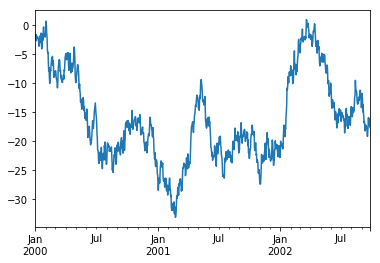

In [170]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

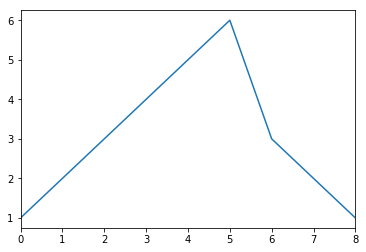

In [172]:
tss = pd.Series([1,2,3,4,5,6,3,2,1], index=range(9))
tss.plot()

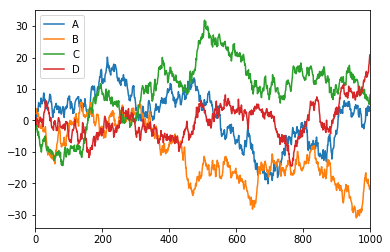

In [175]:
df = pd.DataFrame(np.random.randn(1000, 4), index=range(1000), columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

# Getting Data In/Out

In [177]:
# Write to csv
#df.to_csv('name')

# Read csv
#pd.read_csv()

In [ ]:
# To excel file
# df.to_excel('name', sheet_name='Sheet1')

# Reading excel
# def.read_excel('name', 'sheet1', index_col=None, na_values=['NA'])